## Crop and Fertilizer Recommendation System using ML

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
fertilizer = pd.read_csv("dataset/Fertilizer Prediction.csv")

In [5]:
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [6]:
fertilizer.tail()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP
98,29,58,57,Black,Sugarcane,12,0,10,20-20


In [7]:
fertilizer.shape

(99, 9)

In [8]:
fertilizer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [9]:
fertilizer.isnull()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
94,False,False,False,False,False,False,False,False,False
95,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False


In [10]:
fertilizer.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [11]:
fertilizer.duplicated().sum()

0

In [12]:
fertilizer.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [13]:
fertilizer.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [14]:
fertilizer['Fertilizer Name'].value_counts()

Fertilizer Name
Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: count, dtype: int64

In [15]:
features = fertilizer.columns.to_list()
features.remove('Fertilizer Name')
print(features)

['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous']


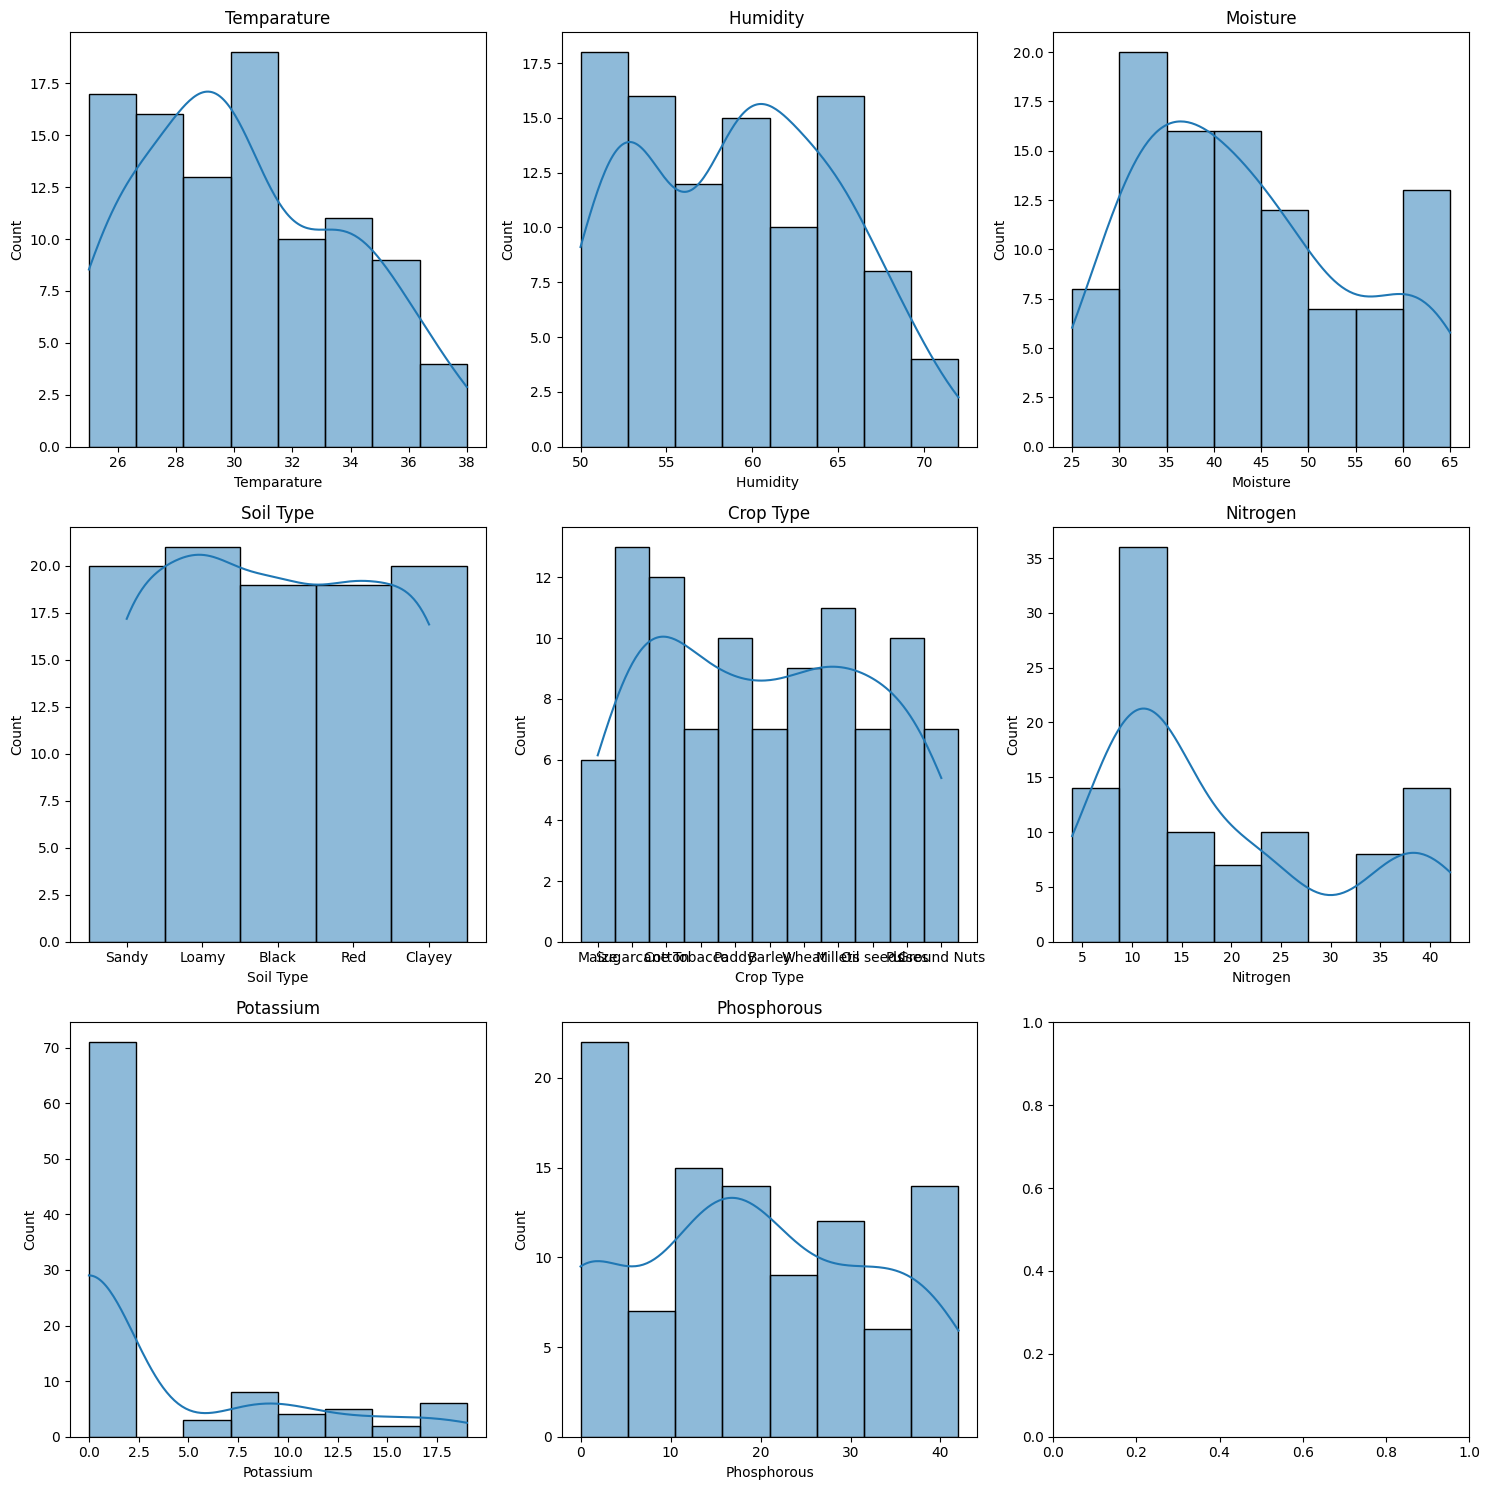

In [17]:
# Visualize the distribution 
fig, ax = plt.subplots(3,3, figsize = (15,15))
for i, subplots in zip(features, ax.flatten()):
    sns.histplot(fertilizer[i],ax = subplots ,kde= True)
    subplots.set_title(i)
plt.tight_layout()
plt.show()

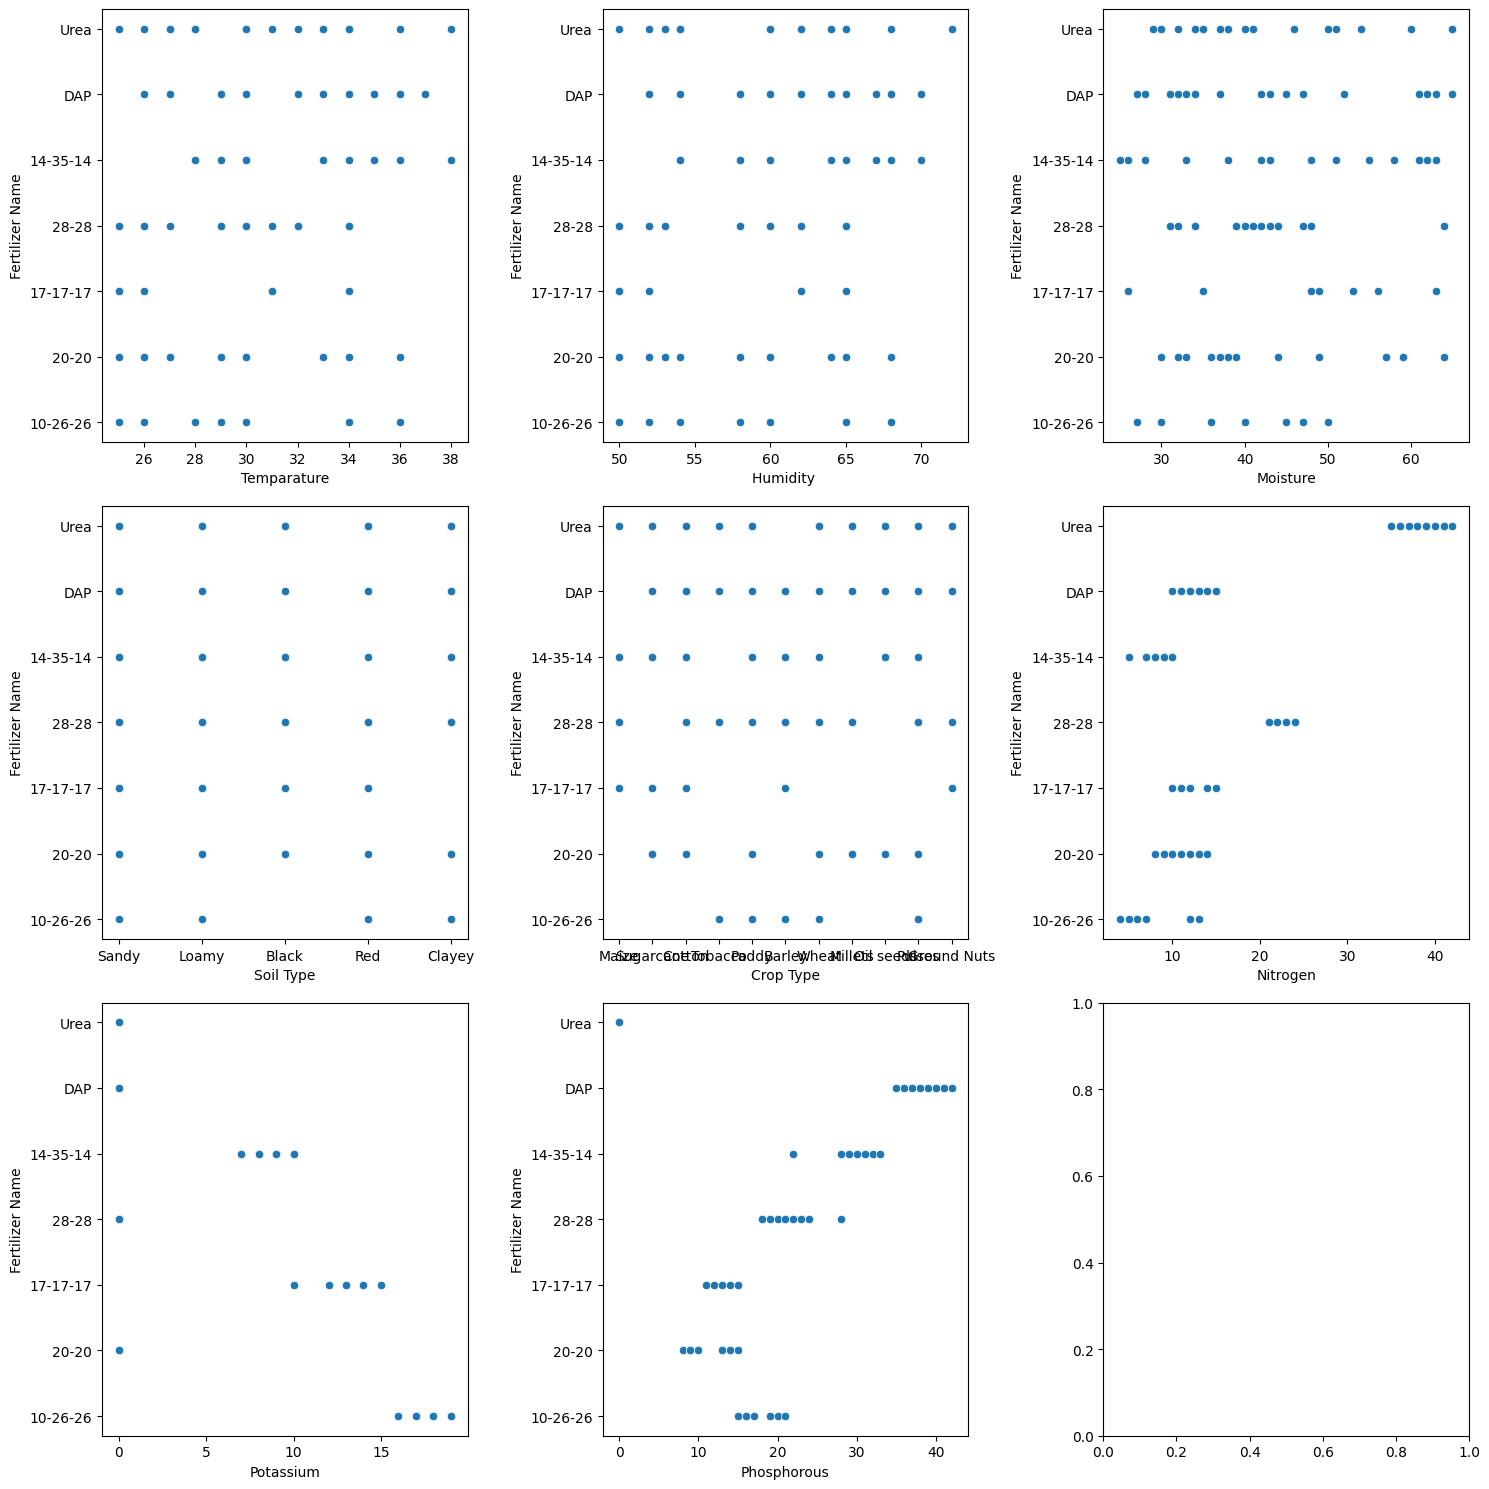

In [19]:
# Plotting scatter plot
fig, ax = plt.subplots(3,3, figsize = (15,15))
for i,subplots in zip(features, ax.flatten()):
    sns.scatterplot(x = i, y = 'Fertilizer Name', data = fertilizer, ax = subplots)
plt.tight_layout()
plt.show()

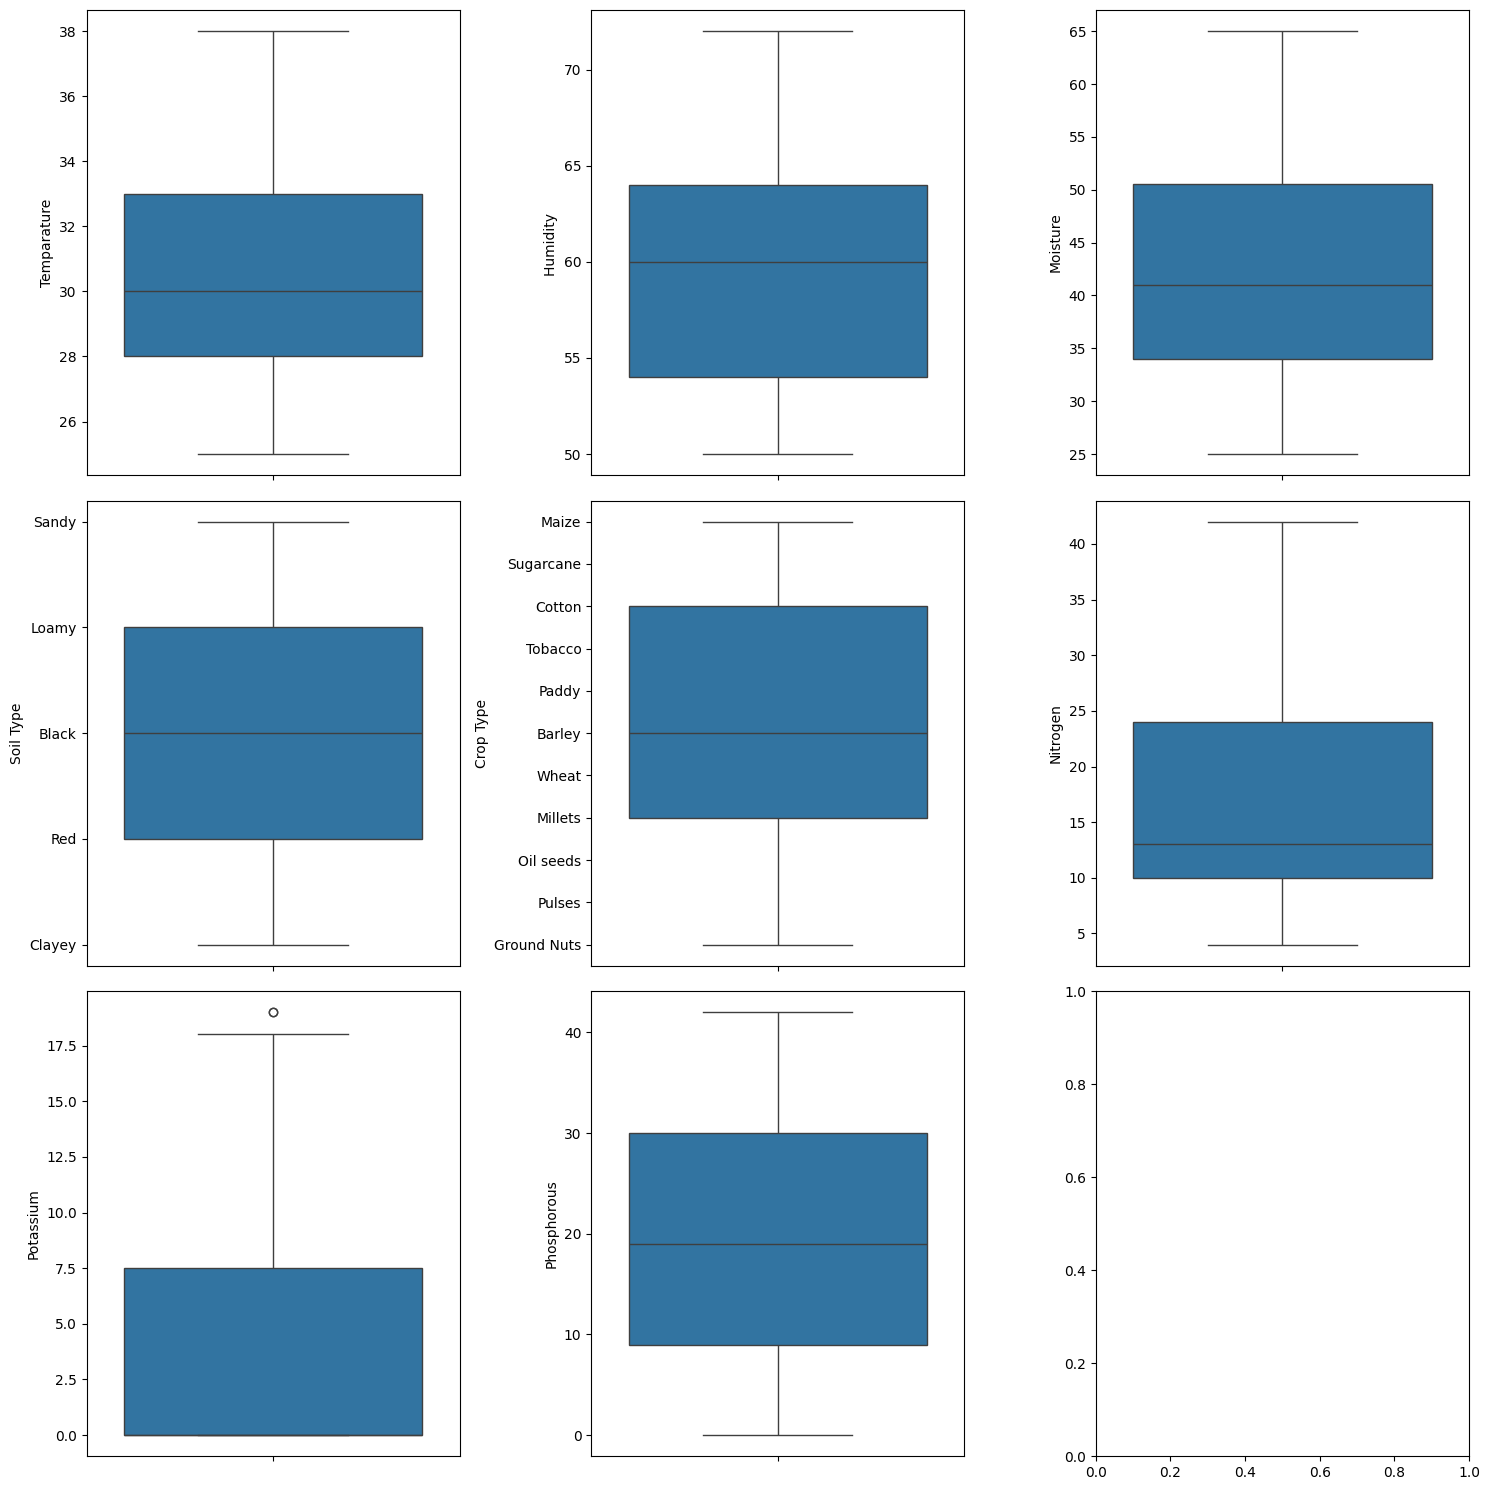

In [20]:
# Finding outliers - boxplot
fig, ax = plt.subplots(3,3, figsize = (15,15))
for i,subplots in zip(features, ax.flatten()):
    sns.boxplot(fertilizer[i], ax = subplots)
plt.tight_layout()
plt.show()

In [21]:
# Correlation of the features
num_cols = fertilizer.select_dtypes(include = [np.number])
print(num_cols)

    Temparature  Humidity   Moisture  Nitrogen  Potassium  Phosphorous
0            26         52        38        37          0            0
1            29         52        45        12          0           36
2            34         65        62         7          9           30
3            32         62        34        22          0           20
4            28         54        46        35          0            0
..          ...        ...       ...       ...        ...          ...
94           25         50        32        24          0           19
95           30         60        27         4         17           17
96           38         72        51        39          0            0
97           36         60        43        15          0           41
98           29         58        57        12          0           10

[99 rows x 6 columns]


In [22]:
corr = num_cols.corr()
print(corr)

             Temparature  Humidity   Moisture  Nitrogen  Potassium  \
Temparature     1.000000   0.973164  0.091222 -0.033771  -0.023424   
Humidity        0.973164   1.000000  0.091342 -0.060646  -0.003833   
Moisture        0.091222   0.091342  1.000000 -0.095945   0.027727   
Nitrogen       -0.033771  -0.060646 -0.095945  1.000000  -0.500087   
Potassium      -0.023424  -0.003833  0.027727 -0.500087   1.000000   
Phosphorous     0.207545   0.204044  0.009276 -0.686971   0.089192   

             Phosphorous  
Temparature     0.207545  
Humidity        0.204044  
Moisture        0.009276  
Nitrogen       -0.686971  
Potassium       0.089192  
Phosphorous     1.000000  


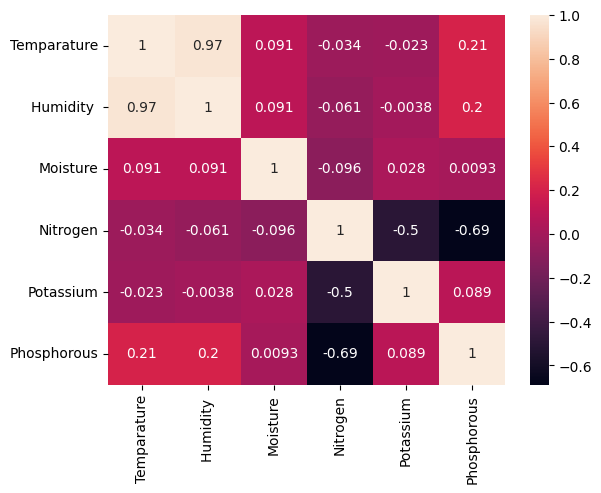

In [24]:
# Visualizing with Heatmap
sns.heatmap(corr,annot= True)
plt.show()

### Encoding

In [26]:
fertilizer['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [27]:
fertilizer_dict = {
    'Urea' : 0 , 'DAP' : 1, '14-35-14' : 2, '28-28' : 3, '17-17-17' : 4, '20-20' : 5,
       '10-26-26' : 6
}

In [28]:
fertilizer['fertilizer_no'] = fertilizer['Fertilizer Name'].map(fertilizer_dict)
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,fertilizer_no
0,26,52,38,Sandy,Maize,37,0,0,Urea,0
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP,1
2,34,65,62,Black,Cotton,7,9,30,14-35-14,2
3,32,62,34,Red,Tobacco,22,0,20,28-28,3
4,28,54,46,Clayey,Paddy,35,0,0,Urea,0


In [29]:
fertilizer.tail()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,fertilizer_no
94,25,50,32,Clayey,Pulses,24,0,19,28-28,3
95,30,60,27,Red,Tobacco,4,17,17,10-26-26,6
96,38,72,51,Loamy,Wheat,39,0,0,Urea,0
97,36,60,43,Sandy,Millets,15,0,41,DAP,1
98,29,58,57,Black,Sugarcane,12,0,10,20-20,5


In [38]:
fertilizer.drop('Fertilizer Name', axis=1)


KeyError: "['Fertilizer Name'] not found in axis"

In [34]:
print(fertilizer.columns)

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'fertilizer_no'],
      dtype='object')
